# Universidad del Valle de Guatemala
# (CC3084) Data Science
# Proyecto - Análisis Exploratorio

Miembros del equipo de trabajo:
- Pedro Pablo Arriola Jiménez (20188)
- Oscar Fernando López Barrios (20679)
- Marco Pablo Orozco Saravia (20857)
- Yong Bum Park (20117)
- Santiago Taracena Puga (20017)

## Análisis exploratorio

En esta etapa inicial del proyecto, este archivo `main.ipynb` se centra exclusivamente en el análisis exploratorio de los datos proporcionados. Se han realizado operaciones de limpieza y preprocesamiento básicas para asegurar la calidad de los datos y facilitar su uso en etapas posteriores del proyecto. El desarrollo y entrenamiento de modelos de aprendizaje automático, así como la implementación de soluciones, se abordarán en secciones posteriores de este proyecto.

El primer procedimiento que se realizó fue importar las librerías que en principio serán necesarias con el objetivo de la realización del análisis exploratorio del proyecto. Algunas de estas librerías son las clásicas pandas y numpy, sumamente importantes para el desarrollo de cualquier proyecto que tenga qué ver con el análisis de datos y, en muchos casos, el aprendizaje profundo como el que se llevará a cabo para el desarrollo de la solución de este proyecto.

In [20]:
# Proceso para importar pandas y numpy.
import pandas as pd
import numpy as np

Posteriormente se observó el contenido dentro del archivo `sample_submission.csv`. Pese a que los datos principales a analizar son las imágenes que se encuentran en la capreta de entrenamiento, debemos conocer el contenido de los .csv brindados para ligar su información a las imágenes que se van a utilizar.

In [21]:
# Lectura del archivo sample_submission.csv.
sample_submission_data = pd.read_csv("./data/sample_submission.csv")
sample_submission_data.head()

,id,height,width,prediction_string
0,72e40acccadf,512,512,0 1.0 eNoLTDAwyrM3yI/PMwcAE94DZA==


Luego de la lectura de este archivo, podemos leer el siguiente que se encuentra en la parte exterior de la carpeta de data que nos proporcionó Kaggle. Este archivo es `tile_meta.csv`, el cual también contiene información interesante.

In [22]:
# Lectura de los primeros datos del archivo tile_meta.csv.
tile_meta_data = pd.read_csv("./data/tile_meta.csv")
tile_meta_data.head()

,id,source_wsi,dataset,i,j
0,0006ff2aa7cd,2,2,16896,16420
1,000e79e206b7,6,3,10240,29184
2,00168d1b7522,2,2,14848,14884
3,00176a88fdb0,7,3,14848,25088
4,0033bbc76b6b,1,1,10240,43008


In [23]:
# Últimos datos presentes en el archivo tile_meta.csv.
tile_meta_data.tail()

,id,source_wsi,dataset,i,j
7028,ffd37b5c6598,13,3,13824,21504
7029,ffd3d193c71e,3,2,7680,16896
7030,ffd77e2517af,13,3,15872,28160
7031,ffe3cbb81f72,10,3,15456,23000
7032,ffe40e3bc324,9,3,13824,19456


In [24]:
# Tupla con la forma del archivo.
tile_meta_data.shape

(7033, 5)

In [25]:
# Descripción de los datos presentes.
tile_meta_data.describe()

,source_wsi,dataset,i,j
count,7033.000000,7033.000000,7033.000000,7033.000000
mean,8.205744,2.707806,14296.542585,23227.014930
std,4.004251,0.571724,5946.054578,10644.032931
min,1.000000,1.000000,1536.000000,2560.000000
25%,6.000000,3.000000,9728.000000,15265.000000
50%,9.000000,3.000000,13824.000000,22528.000000
75%,12.000000,3.000000,18944.000000,29656.000000
max,14.000000,3.000000,30208.000000,52753.000000


Finalmente, el último archivo .csv a observar el contenido es `wsi_meta.csv`.

In [26]:
# Lectura del contenido de wsi_meta.csv.
wsi_meta_data = pd.read_csv("./data/wsi_meta.csv")
wsi_meta_data.head()

,source_wsi,age,sex,race,height,weight,bmi
0,1,58,F,W,160.0,59.0,23.0
1,2,56,F,W,175.2,139.6,45.5
2,3,73,F,W,162.3,87.5,33.2
3,4,53,M,B,166.0,73.0,26.5


In [27]:
# Últimos datos del archivo leído.
wsi_meta_data.tail()

,source_wsi,age,sex,race,height,weight,bmi
0,1,58,F,W,160.0,59.0,23.0
1,2,56,F,W,175.2,139.6,45.5
2,3,73,F,W,162.3,87.5,33.2
3,4,53,M,B,166.0,73.0,26.5


In [28]:
# Tupla con la forma del archivo.
wsi_meta_data.shape

(4, 7)

In [29]:
from PIL import Image

tiff_image = Image.open("./data/test/72e40acccadf.tif")
tiff_image.show()
tiff_image.close()

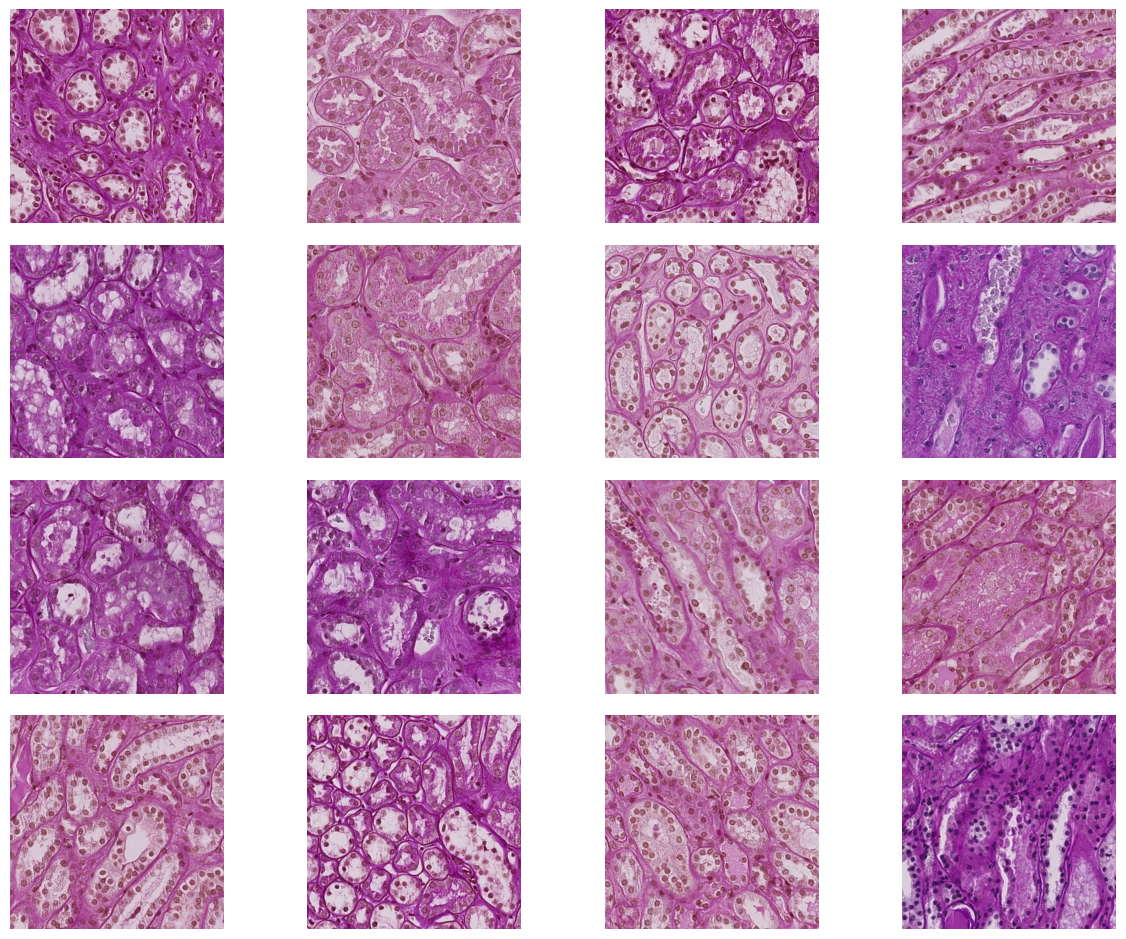

In [30]:
import os
import random
import matplotlib.pyplot as plt

train_path = "./data/train"

train_tiff_images = []

for file in os.listdir(train_path):
    if (file.endswith(".tif")):
        file_path = os.path.join(train_path, file)
        tiff_image = Image.open(file_path)
        train_tiff_images.append(tiff_image)

images_to_show = [random.choice(train_tiff_images) for _ in range(16)]

# Configura el número de columnas en el grid y el tamaño de la figura
num_columnas = 4  # Puedes ajustar este valor según tus preferencias
fig = plt.figure(figsize=(15, 15))

# Muestra las imágenes en un grid
for i, imagen in enumerate(images_to_show, 1):
    ax = fig.add_subplot(len(images_to_show)//num_columnas + 1, num_columnas, i)
    ax.imshow(imagen)
    ax.axis("off")

# Ajusta el espacio entre las imágenes y muestra el grid
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()